## 1. Understanding the Data

### I. GATHERING OR LOADING THE DATA

In [ ]:
#import necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('Copper_Set.csv')
df.head(2)

#Target--> Selling Price

### II. Understanding the details of the data

In [ ]:
print(df.info())

In [ ]:
print(df.isnull().sum())

In [ ]:
print(df.nunique())

In [ ]:
df.columns

In [ ]:
df.dtypes

In [ ]:
df.shape

In [ ]:
df.describe()

## 2.Data Preprocessing And EDA

### I.Converting the irregular datatypes of the Column

In [ ]:
# dealing with data in wrong format,for categorical variables, this step is ignored
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
print(df.dtypes)

### II.Handle missing values with mean/median/mode.

In [ ]:
df.isnull().sum()

In [ ]:
# material_ref has large set of null values
df.drop(columns=['id','material_ref'], inplace=True)

In [ ]:
df.describe().T

In [ ]:
# quantity and selling price values are not below 0. so we convert to null for below 0 values.

df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.describe().T

In [ ]:
df.isnull().sum()

In [ ]:
#Imputing the missing Values
def median_Impute(df,columns):
    median_Value=df[columns].median()
    #df[columns].fillna(median_Value,inplace=True)
    df.fillna({columns: median_Value}, inplace=True)
    
    
def mode_Impute(df,columns):
    mode_Value=df[columns].mode()[0]
    #df[columns].fillna(mode_Value,inplace=True)
    df.fillna({columns: mode_Value}, inplace=True)
    
numerical_Cols=[column for column in df.columns if df[column].dtype!='object']
for col in numerical_Cols:
    median_Impute(df,col)

object_Cols=[column for column in df.columns if df[column].dtype=='object']
for  col in object_Cols:
    mode_Impute(df,col)


In [ ]:
# convert categorical data into numerical data - using map and ordinal encoder methods
from sklearn.preprocessing import OrdinalEncoder
df['status'] = df['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df['item type'] = OrdinalEncoder().fit_transform(df[['item type']])

In [ ]:
print(df.status.unique())
df['item type'].unique()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

### III.Identify Skewness in the dataset

In [ ]:
# find outliers - box plot & skewed data - hist plot and violin plot

def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

### IV.Before Treating Skewness

In [ ]:
for i in ['quantity tons', 'customer', 'country', 'item type', 'application', 'thickness', 'width', 'selling_price']:
    plot(df, i)

In [ ]:
df.describe().T

### V. After Treating Skewness-- Feature Scaling

In [ ]:
# quantity tons, thickness and selling price data are skewd. so using the log transformation method to handle the skewness data

df1 = df.copy()
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])

# after log transformation the data are normally distributed and reduced the skewness. [hist plot and violin plot]
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [ ]:
df1.shape

In [ ]:
df1.describe().T

### Vi.Outliers Handling using IQR[Inter Quartile Range]

In [ ]:
df2 = df1.copy()

In [ ]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe

def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    print(upper_threshold,lower_threshold)
     

# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

outlier(df2, 'quantity tons_log')
outlier(df2, 'thickness_log')
outlier(df2, 'selling_price_log')
outlier(df2, 'width')


In [ ]:
df2.shape

### VII.Visualizing after treating the Outlier

In [ ]:
# transform the outliers to within range using IQR and clip() methods - box plot

for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df2, i)

In [ ]:
df2.describe().T

In [ ]:
df2.isnull().sum()

In [ ]:
df2. dtypes

In [ ]:
df2['item_date']=pd.to_datetime(df2['item_date'])
df2['delivery date']=pd.to_datetime(df2['delivery date'])

In [ ]:
df2['item_date_day']=df2['item_date'].dt.day
df2['item_date_month']=df2['item_date'].dt.month
df2['item_date_year']=df2['item_date'].dt.year

In [ ]:
df2['delivery_date_day']=df2['delivery date'].dt.day
df2['delivery_date_month']=df2['delivery date'].dt.month
df2['delivery_date_year']=df2['delivery date'].dt.year

In [ ]:
# after add the new column of 'quantity tons_log', 'thickness_log', 'selling_price_log', drop the existing columns
df3 = df2.drop(columns=['quantity tons', 'thickness', 'selling_price','item_date','delivery date'])
# df3

In [ ]:
df3.head(2)

In [ ]:
df3.dtypes
df3.shape

### II. SNS Heat Map

In [ ]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity tons_log','customer','country','status','item type','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df3[col].corr()
sns.heatmap(df_heatmap, annot=True)

## Regression Method- Predicting Selling Price

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import  mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [ ]:
df3.columns

In [ ]:
df3.head(2)

### Train Test Split

In [ ]:
# check the train and test accuracy using R2 (R-squared ---> coefficient of determination) to predict selling price

def machine_learning_regression(df, algorithm):

    x = df.drop(columns=['selling_price_log'], axis=1)
    y = df['selling_price_log']
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

    model = algorithm().fit(x_train, y_train)
    # y_pred_train = model.predict(x_train)
    y_pred= model.predict(x_test)
    # r2_train = r2_score(y_train, y_pred_train)
    r2_Score_Value = r2_score(y_test, y_pred)
    MSE_Value=mean_squared_error(y_test,y_pred)
    accuracy_metrics = {'algorithm': algorithm.__name__,
                        'R2_Score' : r2_Score_Value,
                        'MSE'  : MSE_Value}

    return accuracy_metrics

In [106]:
print(machine_learning_regression(df3, DecisionTreeRegressor))
print(machine_learning_regression(df3, LinearRegression))
print(machine_learning_regression(df3, RandomForestRegressor))
print(machine_learning_regression(df3, AdaBoostRegressor))
print(machine_learning_regression(df3, GradientBoostingRegressor))
print(machine_learning_regression(df3, XGBRegressor))    

{'algorithm': 'DecisionTreeRegressor', 'R2_Score': 0.9266162847712779, 'MSE': 0.004762257374862845}
{'algorithm': 'LinearRegression', 'R2_Score': 0.5353780950262811, 'MSE': 0.03015177259133773}
{'algorithm': 'RandomForestRegressor', 'R2_Score': 0.958534607756915, 'MSE': 0.002690908594580445}
{'algorithm': 'AdaBoostRegressor', 'R2_Score': 0.6409028101658574, 'MSE': 0.023303715752876413}
{'algorithm': 'GradientBoostingRegressor', 'R2_Score': 0.8882504568194177, 'MSE': 0.007252018850375516}
{'algorithm': 'XGBRegressor', 'R2_Score': 0.9476250822398278, 'MSE': 0.0033988854009886905}


### Random Forest Performs good.It has low MSE and high r2 Value. So I Choose this Algorithm for Regression

In [ ]:

# GridsearchCV is a cross validation function.

# Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.

# so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
# finally return the best accuracy parameter values based on the score.

# example: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

# note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

In [ ]:

x = df3.drop(columns=['selling_price_log'], axis=1)
y = df3['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

param_grid_r = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2', None]}

grid_search_r = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid_r, cv=5, n_jobs=-1)
grid_search_r.fit(x_train, y_train)

# n_jobs = -1 means it uses the all processors in this process


# evaluate all the parameter combinations and return the best parameters based on score


In [104]:
print(grid_search_r.best_params_)

print(grid_search_r.best_score_)

{'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9544892667784272


### Hyperparameter Tuning For Choosing the best parameter

In [105]:

# predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df3.drop(columns=['selling_price_log'], axis=1)
y = df3['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.9576634281901556,
 'Mean Squared Error': 0.0027474440439468175,
 'Root Mean Squared Error': 0.052416066658485715}

{'algorithm': 'RandomForestRegressor', 'R2_Score': 0.958534607756915, 'MSE': 0.002690908594580445}

Manual Input

In [108]:
# save the regression model by using pickle

with open('regression_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [109]:
# load the pickle model to predict selling price

with open('regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

y_pred = model.predict(np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]]))
np.exp(y_pred[0])


c:\Users\Kobalan M\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


1024.6454329765763

## Classification

In [110]:
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import pickle

In [111]:
df3.status.unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [ ]:
df3.shape

In [112]:
df3 = df3[(df3.status == 1) | (df3.status == 0)]
df3.shape

(150450, 16)

In [ ]:
df3.status.value_counts()

In [113]:

# in status feature, the 'Won' and 'Lost' value difference is very high. So we need to oversampling to reduce the difference

x = df3.drop('status', axis=1)
y = df3['status']

x_new, y_new = SMOTETomek().fit_resample(x,y)
x.shape, y.shape, x_new.shape, y_new.shape

((150450, 15), (150450,), (229470, 15), (229470,))

In [114]:

# check the accuracy of training and testing using metrics
# algorithm.__name__  - it return the algorithm name

def machine_learning_classification(x_new,y_new, algorithm):

    x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
    model = algorithm().fit(x_train, y_train)

    # y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    # accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
    accuracy= metrics.accuracy_score(y_test, y_pred)
    precision=metrics.precision_score(y_test,y_pred)
  
    accuracy_metrics = {'algorithm'    : algorithm.__name__,
                        'accuracy': accuracy,
                        'Precision' : precision}

    return accuracy_metrics

In [115]:
print(machine_learning_classification(x_new,y_new,LogisticRegression))
print(machine_learning_classification(x_new, y_new, DecisionTreeClassifier))
print(machine_learning_classification(x_new, y_new, RandomForestClassifier))
print(machine_learning_classification(x_new, y_new, AdaBoostClassifier))
print(machine_learning_classification(x_new, y_new, GradientBoostingClassifier))
print(machine_learning_classification(x_new, y_new, XGBClassifier))

{'algorithm': 'LogisticRegression', 'accuracy': 0.5411382751557938, 'Precision': 0.5264992596248766}
{'algorithm': 'DecisionTreeClassifier', 'accuracy': 0.9621737046236981, 'Precision': 0.9643377322681732}
{'algorithm': 'RandomForestClassifier', 'accuracy': 0.9828299995642132, 'Precision': 0.9910670418509089}


c:\Users\Kobalan M\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


{'algorithm': 'AdaBoostClassifier', 'accuracy': 0.7602954634592757, 'Precision': 0.7619916347779656}
{'algorithm': 'GradientBoostingClassifier', 'accuracy': 0.812197672898418, 'Precision': 0.819795807734008}
{'algorithm': 'XGBClassifier', 'accuracy': 0.9485771560552577, 'Precision': 0.9621949563091411}



 GridsearchCV is a cross validation function.

Hyper parameter tuning - we give parameter values manually in the algorithm to reduce the overfitting issue and get better accuracy.
so using gridserachcv method - to pass the mulitiple values in each parameters and it try to evaluate all the combination of values and
finally return the best accuracy parameter values based on the score.

example: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}

note: This process can take long time (avg: 1 hour 15 mins). Please wait be patient.

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

param_grid = {'max_depth'        : [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [1, 2, 4],
              'max_features'     : ['sqrt', 'log2']}
# n_jobs = -1 means it uses the all processors in this process
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)
# evaluate all the parameter combinations and return the best parameters based on score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.9729376376278968


In [117]:

# passing the parameters in the random forest algorithm and check the accuracy for training and testing

# x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
# y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
# accuracy_train = metrics.accuracy_score(y_train, y_pred_train)
accuracy = metrics.accuracy_score(y_test, y_pred_test)
precision = metrics.precision_score(y_test, y_pred_test)
accuracy, precision

(0.973700265829956, 0.9912544411041269)

In [118]:
# predict the status and check the accuracy using metrics

x_train, x_test, y_train, y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model.predict(x_test)

print(confusion_matrix(y_true=y_test, y_pred=y_pred))
print(classification_report(y_true=y_test, y_pred=y_pred))

[[22920   197]
 [ 1036 21741]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23117
           1       0.99      0.95      0.97     22777

    accuracy                           0.97     45894
   macro avg       0.97      0.97      0.97     45894
weighted avg       0.97      0.97      0.97     45894



In [119]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold = roc_curve(y_true=y_test, y_score=y_pred)
auc_curve = auc(x=FP, y=TP)
print(auc_curve)

0.9729968265089399


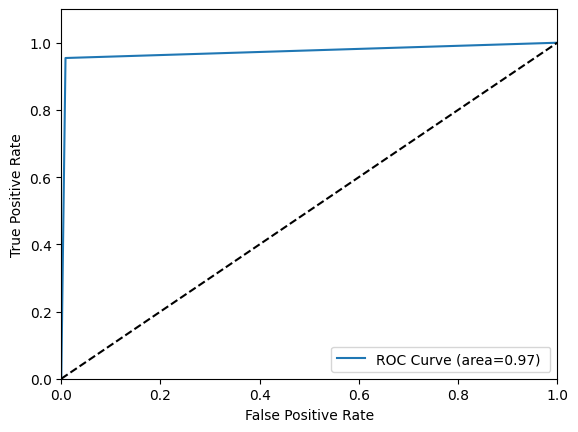

In [120]:


plt.plot(FP, TP, label=f"ROC Curve (area={round(auc_curve, 2)}) ")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [121]:

# save the classification model by using pickle

with open('classification_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [122]:
# load pickle model to predict the status (like Trained brain).

with open('classification_model.pkl', 'rb') as f:
    model = pickle.load(f)

user_data = np.array([[30223403, 78, 5, 10, 1500, 1668701718, 2.2, 0, 7.13, 1,4,2021,1,7,2021]])
y_p = model.predict(user_data)
if y_p[0] == 1:
    print('Won')
else:
    print('Lose')

Lose


c:\Users\Kobalan M\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [126]:
df.country.unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [127]:
df.application.unique()

array([10., 41., 28., 59., 15.,  4., 38., 56., 42., 26., 27., 19., 20.,
       66., 29., 22., 40., 25., 67., 79.,  3., 99.,  2.,  5., 39., 69.,
       70., 65., 58., 68.])

In [131]:
df.product_ref.unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

In [133]:
df.customer.nunique()

1169